<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/AI%20study/ODE/ErrorCorr_f(xy)_21_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

x:  0
0 Cost:  22.617746 

15000 Cost:  1.3012722 

30000 Cost:  0.42404076 





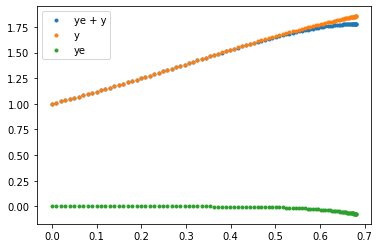

In [2]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
    return tf.tensordot(a1, W[1], axes = 1)

def d_neural_network_dx(W, x, k=1):
    return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

x_space = []
y_space = []
ye_space = []
corr_space = []
cost_space = []
x_number = 1
w_number = 6
step_number = 30000

for z in range(x_number):
  x = tf.Variable(np.array([[i/100] for i in range(0, 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  def f(x, y):
    return y

  ye = (x**(w_number + 1)) * neural_network(W, x)
  yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - f(x, y)))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  if z % int(x_number / 1) == 0:
    print("x: ", z)
  for step in range(step_number + 1):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, f(x, y), x, train])
    if z % int(x_number / 1) == 0:
      if step % int(step_number / 2) == 0:
          print(step, "Cost: ", cost_val, "\n")
  if z % int(x_number / 1) == 0:
    print("\n")

  x_space += list(x_val)
  corr_space += list(ye_val + y_val)
  y_space += list(y_val)
  ye_space += list(ye_val)

  sess.close()

plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
plt.plot(x_space, y_space, '.', label = 'f(x,y)')
plt.plot(x_space, ye_space, '.', label = 'ye')
plt.legend()
plt.show()

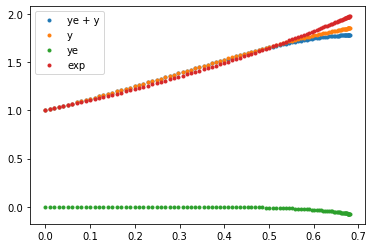

In [3]:
plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
plt.plot(x_space, y_space, '.', label = 'f(x,y)')
plt.plot(x_space, ye_space, '.', label = 'ye')
plt.plot(x_space, np.exp(x_space), '.', label = 'exp')
plt.legend()
plt.show()